In [63]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
fc=pd.read_csv('C:\\Users\\Akshay N R\\Desktop\\Data Science\\assignments\\decision trees\\Fraud_check.csv')
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA and Visualisation

In [3]:
fc=fc[['Taxable.Income','Marital.Status','Undergrad','City.Population','Work.Experience','Urban']]
fc

,Taxable.Income,Marital.Status,Undergrad,City.Population,Work.Experience,Urban
0,68833,Single,NO,50047,10,YES
1,33700,Divorced,YES,134075,18,YES
2,36925,Married,NO,160205,30,YES
3,50190,Single,YES,193264,15,YES
4,81002,Married,NO,27533,28,NO
...,...,...,...,...,...,...
595,76340,Divorced,YES,39492,7,YES
596,69967,Divorced,YES,55369,2,YES
597,47334,Divorced,NO,154058,0,YES
598,98592,Married,YES,180083,17,NO


In [4]:
fc1=fc.rename({'Marital.Status':'MS','Taxable.Income':'TI','City.Population':'CP','Work.Experience':'WE'},axis=1)
fc1

,TI,MS,Undergrad,CP,WE,Urban
0,68833,Single,NO,50047,10,YES
1,33700,Divorced,YES,134075,18,YES
2,36925,Married,NO,160205,30,YES
3,50190,Single,YES,193264,15,YES
4,81002,Married,NO,27533,28,NO
...,...,...,...,...,...,...
595,76340,Divorced,YES,39492,7,YES
596,69967,Divorced,YES,55369,2,YES
597,47334,Divorced,NO,154058,0,YES
598,98592,Married,YES,180083,17,NO


In [5]:
fc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TI         600 non-null    int64 
 1   MS         600 non-null    object
 2   Undergrad  600 non-null    object
 3   CP         600 non-null    int64 
 4   WE         600 non-null    int64 
 5   Urban      600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
fc1.describe()

,TI,CP,WE
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
fclabel=fc1.copy()

In [8]:
fclabel

,TI,MS,Undergrad,CP,WE,Urban
0,68833,Single,NO,50047,10,YES
1,33700,Divorced,YES,134075,18,YES
2,36925,Married,NO,160205,30,YES
3,50190,Single,YES,193264,15,YES
4,81002,Married,NO,27533,28,NO
...,...,...,...,...,...,...
595,76340,Divorced,YES,39492,7,YES
596,69967,Divorced,YES,55369,2,YES
597,47334,Divorced,NO,154058,0,YES
598,98592,Married,YES,180083,17,NO


In [9]:
fclabel.MS.unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [10]:
fclabel.Undergrad.unique()

array(['NO', 'YES'], dtype=object)

In [11]:
fclabel.Urban.unique()

array(['YES', 'NO'], dtype=object)

In [12]:
fclabel['MS'].replace(['Single','Divorced','Married'],[0,0,1],inplace=True)
fclabel['Undergrad'].replace(['NO','YES'],[0,1],inplace=True)
fclabel['Urban'].replace(['YES','NO'],[1,0],inplace=True)

In [13]:
fclabel

,TI,MS,Undergrad,CP,WE,Urban
0,68833,0,0,50047,10,1
1,33700,0,1,134075,18,1
2,36925,1,0,160205,30,1
3,50190,0,1,193264,15,1
4,81002,1,0,27533,28,0
...,...,...,...,...,...,...
595,76340,0,1,39492,7,1
596,69967,0,1,55369,2,1
597,47334,0,0,154058,0,1
598,98592,1,1,180083,17,0


In [14]:
def TI(data):
    data.loc[data['TI']<=30000,'TI']=0       #risky=0, good = 1
    data.loc[data['TI']>30000,'TI']=1
    return data
TI(fclabel);

In [15]:
fclabel

,TI,MS,Undergrad,CP,WE,Urban
0,1,0,0,50047,10,1
1,1,0,1,134075,18,1
2,1,1,0,160205,30,1
3,1,0,1,193264,15,1
4,1,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,1,0,0,154058,0,1
598,1,1,1,180083,17,0


In [16]:
fclabel.TI.value_counts()

1    476
0    124
Name: TI, dtype: int64

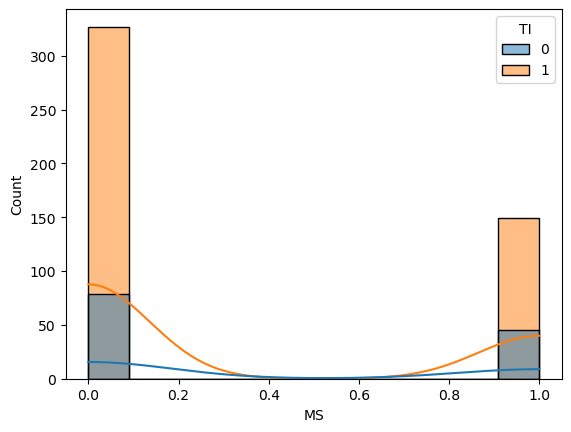

In [19]:
sns.histplot(x='MS', data=fclabel, kde=True, hue='TI');

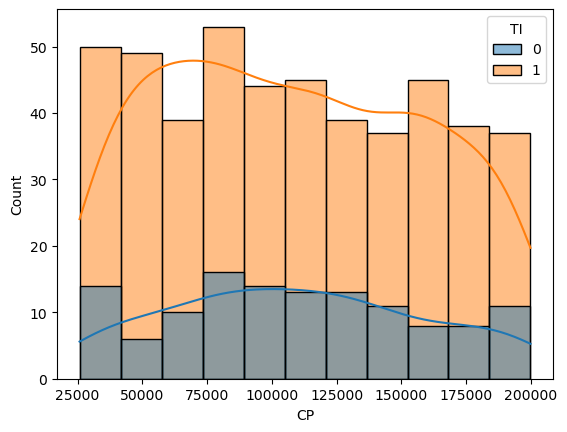

In [20]:
sns.histplot(x='CP', data=fclabel, kde=True, hue='TI');

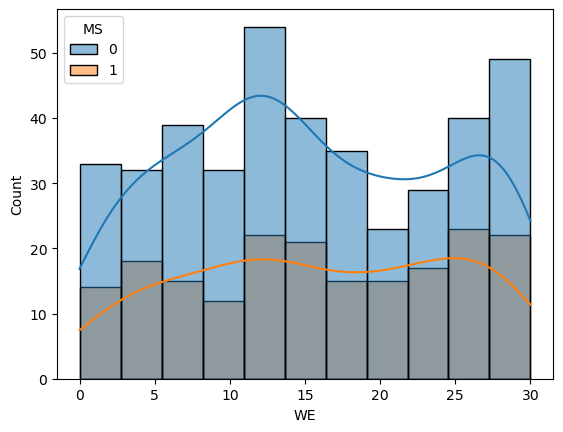

In [21]:
sns.histplot(x='WE', data=fclabel, kde=True, hue='MS');

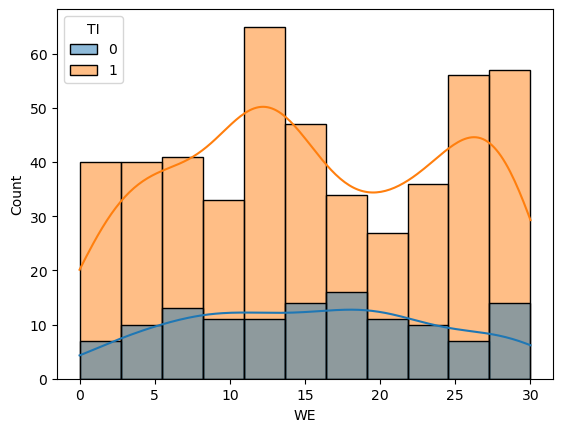

In [22]:
sns.histplot(x='WE', data=fclabel, kde=True, hue='TI');

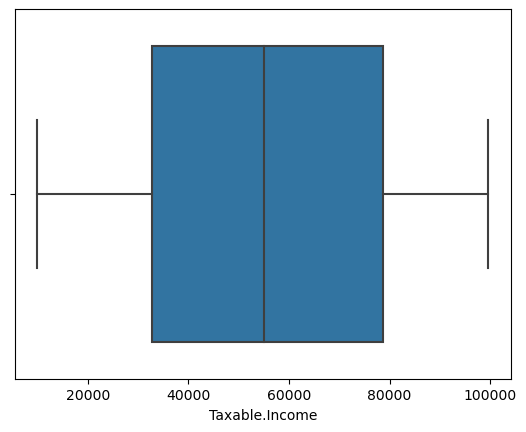

In [25]:
sns.boxplot(fc['Taxable.Income']);

In [26]:
fclabel.describe()

,TI,MS,Undergrad,CP,WE,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.793333,0.323333,0.520000,108747.368333,15.558333,0.503333
std,0.405252,0.468139,0.500017,49850.075134,8.842147,0.500406
min,0.000000,0.000000,0.000000,25779.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,66966.750000,8.000000,0.000000
50%,1.000000,0.000000,1.000000,106493.500000,15.000000,1.000000
75%,1.000000,1.000000,1.000000,150114.250000,24.000000,1.000000
max,1.000000,1.000000,1.000000,199778.000000,30.000000,1.000000


In [27]:
fclabel.corr()

,TI,MS,Undergrad,CP,WE,Urban
TI,1.000000,-0.043178,-0.012523,-0.012225,0.001972,-0.004830
MS,-0.043178,1.000000,0.015120,-0.007035,0.033347,0.016771
Undergrad,-0.012523,0.015120,1.000000,0.079579,-0.005362,-0.000267
CP,-0.012225,-0.007035,0.079579,1.000000,0.013135,-0.040098
WE,0.001972,0.033347,-0.005362,0.013135,1.000000,-0.094559
Urban,-0.004830,0.016771,-0.000267,-0.040098,-0.094559,1.000000


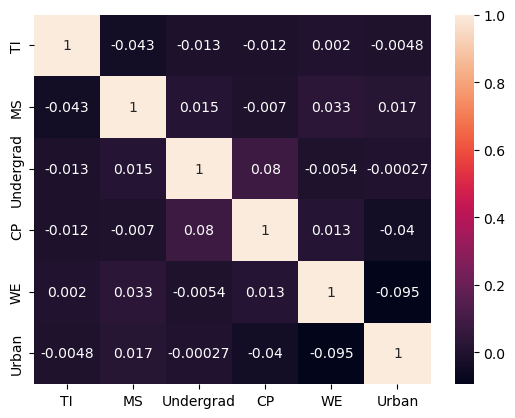

In [28]:
sns.heatmap(fclabel.corr(),annot=True);

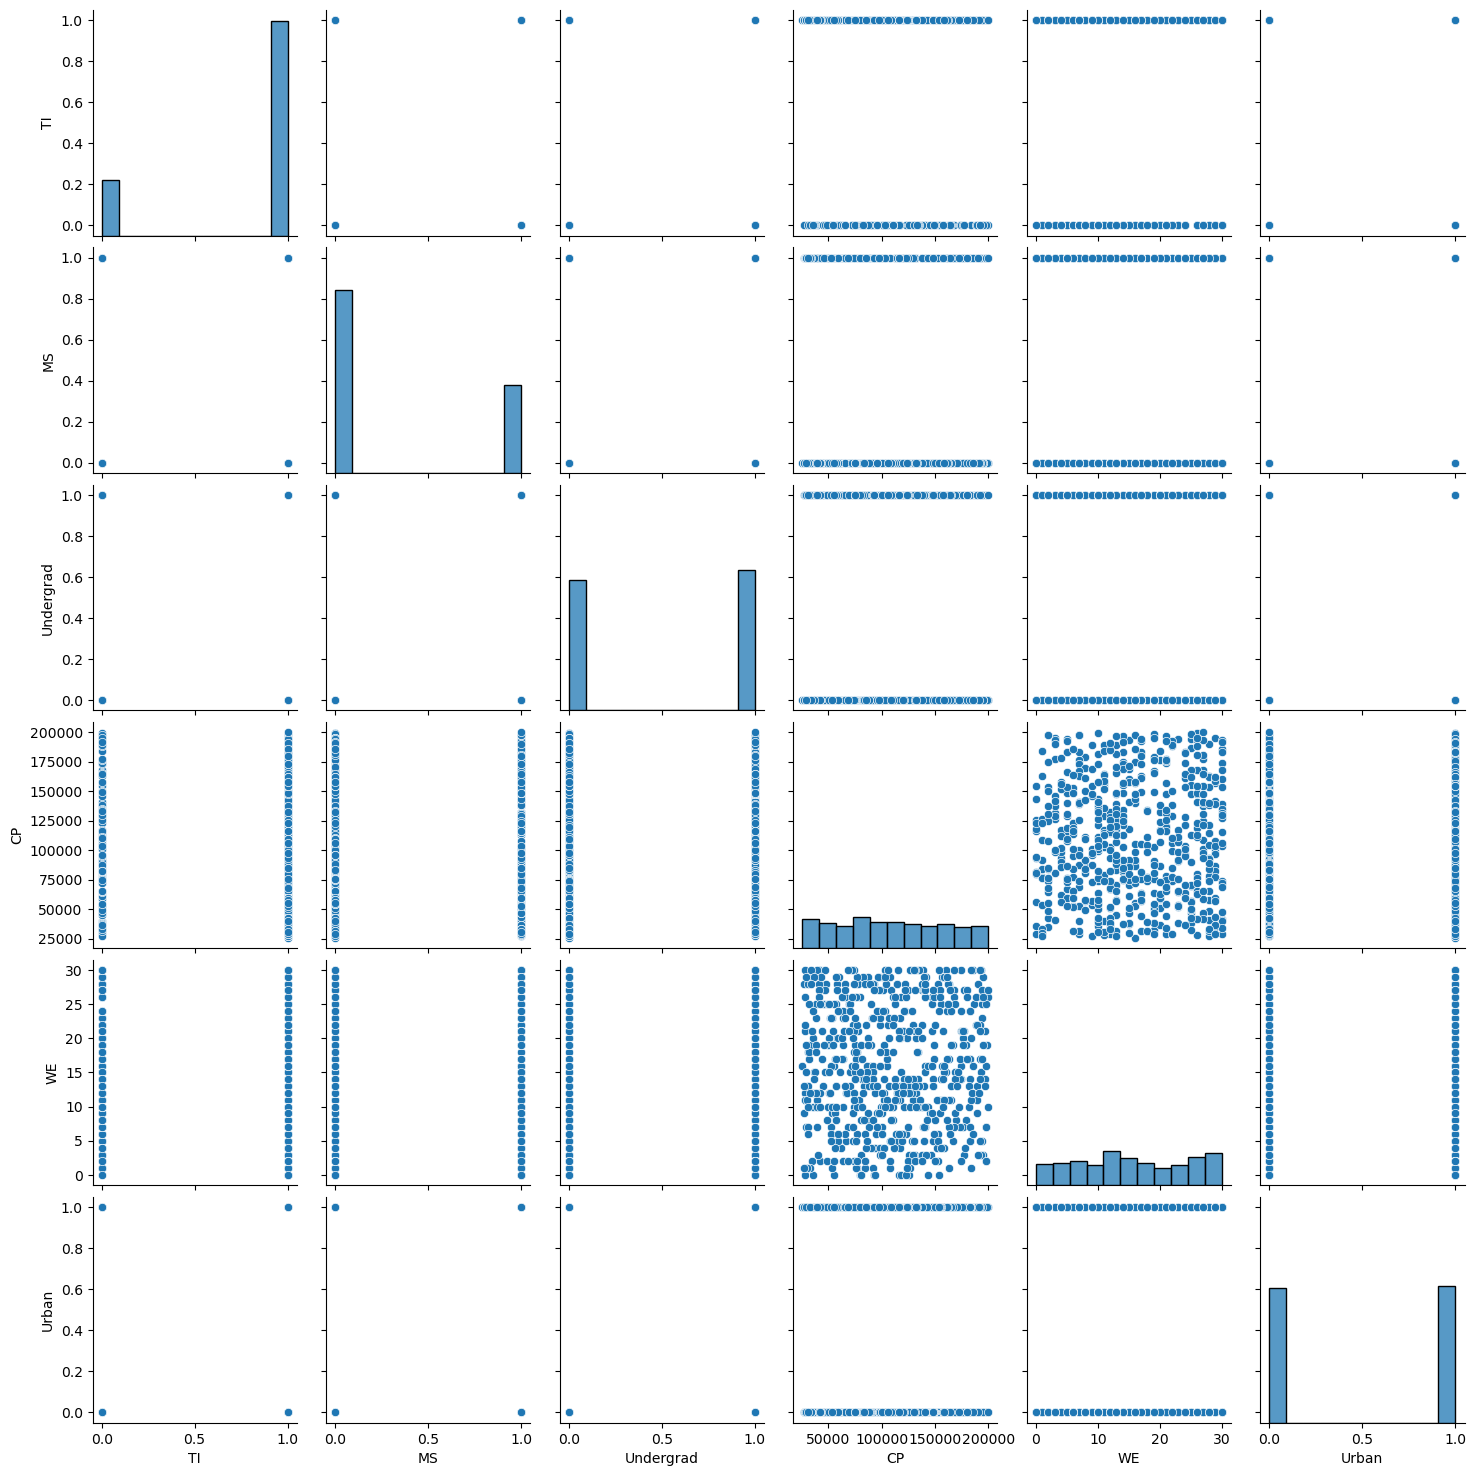

In [29]:
sns.pairplot(fclabel)

In [30]:
#normal data
x=fclabel.iloc[:,1:]
y=fclabel.iloc[:,0]

In [31]:
x

,MS,Undergrad,CP,WE,Urban
0,0,0,50047,10,1
1,0,1,134075,18,1
2,1,0,160205,30,1
3,0,1,193264,15,1
4,1,0,27533,28,0
...,...,...,...,...,...
595,0,1,39492,7,1
596,0,1,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TI, Length: 600, dtype: int64

Standardising and splitting the data

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()

In [46]:
xscaled=scaler.fit_transform(x)
xscaled

array([[-0.6912543 , -1.040833  , -1.17852072, -0.62914254,  0.99335541],
       [-0.6912543 ,  0.96076892,  0.50850002,  0.27636996,  0.99335541],
       [ 1.4466456 , -1.040833  ,  1.03310911,  1.63463872,  0.99335541],
       ...,
       [-0.6912543 , -1.040833  ,  0.90969648, -1.76103318,  0.99335541],
       [ 1.4466456 ,  0.96076892,  1.43219749,  0.1631809 , -1.00668904],
       [-0.6912543 , -1.040833  ,  0.9915901 ,  0.04999184, -1.00668904]])

In [47]:
df1=pd.DataFrame(xscaled,columns=fclabel.columns[1:])
df1

,MS,Undergrad,CP,WE,Urban
0,-0.691254,-1.040833,-1.178521,-0.629143,0.993355
1,-0.691254,0.960769,0.508500,0.276370,0.993355
2,1.446646,-1.040833,1.033109,1.634639,0.993355
3,-0.691254,0.960769,1.696831,-0.063197,0.993355
4,1.446646,-1.040833,-1.630532,1.408261,-1.006689
...,...,...,...,...,...
595,-0.691254,0.960769,-1.390432,-0.968710,0.993355
596,-0.691254,0.960769,-1.071672,-1.534655,0.993355
597,-0.691254,-1.040833,0.909696,-1.761033,0.993355
598,1.446646,0.960769,1.432197,0.163181,-1.006689


In [48]:
X=df1.iloc[:,:]
Y=fclabel.iloc[:,0]

In [49]:
X

,MS,Undergrad,CP,WE,Urban
0,-0.691254,-1.040833,-1.178521,-0.629143,0.993355
1,-0.691254,0.960769,0.508500,0.276370,0.993355
2,1.446646,-1.040833,1.033109,1.634639,0.993355
3,-0.691254,0.960769,1.696831,-0.063197,0.993355
4,1.446646,-1.040833,-1.630532,1.408261,-1.006689
...,...,...,...,...,...
595,-0.691254,0.960769,-1.390432,-0.968710,0.993355
596,-0.691254,0.960769,-1.071672,-1.534655,0.993355
597,-0.691254,-1.040833,0.909696,-1.761033,0.993355
598,1.446646,0.960769,1.432197,0.163181,-1.006689


In [50]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TI, Length: 600, dtype: int64

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=50)

In [52]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(420, 5) (180, 5) (420,) (180,)


# Building model using Random Forest Classification on default data

In [33]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=1000, max_features=5,criterion='gini')
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7416666666666666


In [53]:
#Splitting x and y into train and test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [36]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(420, 5) (180, 5) (420,) (180,)


In [54]:
#Model on default/normal data splitted
model.fit(x_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=1000)

In [55]:
y_pred_test=model.predict(x_test)
acc=accuracy_score(y_test, y_pred_test)*100
print("Accuracy=", acc)
print(confusion_matrix(y_test, y_pred_test))

Accuracy= 73.88888888888889
[[  2  38]
 [  9 131]]


# Building model using RandomForest Classification on Standardised data

In [64]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
stdmodel = RandomForestClassifier(n_estimators=1000, max_features=5,criterion='entropy')
results = cross_val_score(stdmodel,X , Y, cv=kfold)
print(results.mean())

0.7433333333333333


In [61]:
stdmodel.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=1000)

In [62]:
Y_pred_test=stdmodel.predict(X_test)
acc=accuracy_score(Y_test, Y_pred_test)*100
print("Accuracy=", acc)
print(confusion_matrix(Y_test, Y_pred_test))

Accuracy= 75.0
[[  4  30]
 [ 15 131]]


we got almost same accuracy on both normal and standardised data.